In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Movie shape: (9742, 3)
Rating shape: (100836, 4)

 Movies head:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

 Rating head:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

 Missing values:
movieId    0
title      0
genres     0
dtype: int64
userId       0
movieId      

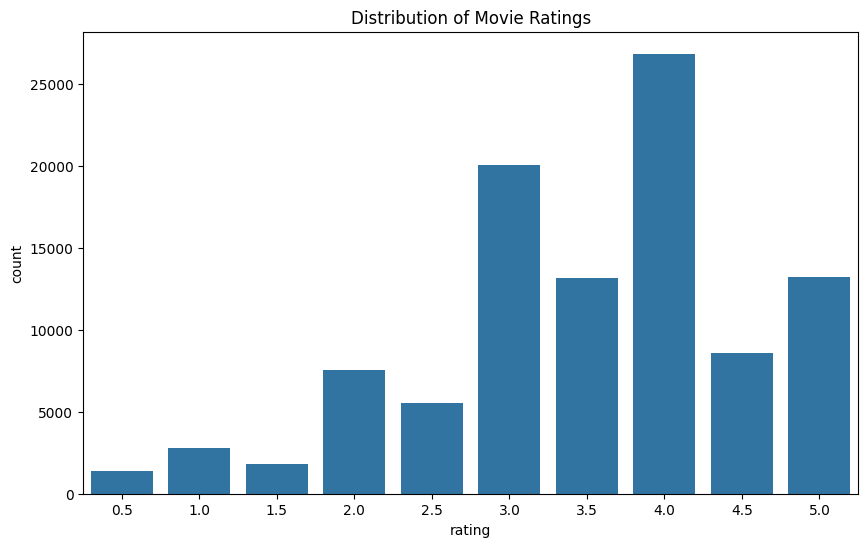


 Rating per user statistics:
count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: rating, dtype: float64

 Rating per movie statistics:
count    9724.000000
mean       10.369807
std        22.401005
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: rating, dtype: float64


In [2]:
movie = pd.read_csv('../data/movies.csv')
rating = pd.read_csv('../data/ratings.csv')
links = pd.read_csv('../data/links.csv')
tags = pd.read_csv('../data/tags.csv')

print("Movie shape:", movie.shape)
print("Rating shape:", rating.shape)

print("\n Movies head:")
print(movie.head())

print("\n Rating head:")
print(rating.head())

print("\n Missing values:")
print(movie.isnull().sum())
print(rating.isnull().sum())

#Basic Statistics
print("Rating Statistics:")
print(rating["rating"].describe())

#Distribution of Ratings
plt.figure(figsize=(10,6))
sns.countplot(x='rating', data=rating)
plt.title('Distribution of Movie Ratings')
plt.savefig('../data/rating_distrubution.png')
plt.show()

#Number of rating per user
rating_per_user = rating.groupby('userId')['rating'].count()
print("\n Rating per user statistics:")
print(rating_per_user.describe())

#Number of ratings per movie
rating_per_user = rating.groupby('movieId')['rating'].count()
print("\n Rating per movie statistics:")
print(rating_per_user.describe())

In [3]:
#Additiona; analysis

movie_rating_counts= rating.groupby('movieId')['rating'].count()
top_10_rated = movie_rating_counts.sort_values(ascending=False).head(10)
print("\n Top 10 rated movies: ")
for movie_id, count in top_10_rated.items():
    movie_title = movie[movie['movieId']==movie_id]['title'].values[0]
    print(f"{movie_title}: {count} ratings")
    
#Avegarage rating per movie

avg_rating_per_movie = rating.groupby('movieId')['rating'].mean()
print(f"Average rating per movie statistics: {avg_rating_per_movie.mean():.2f}" )

#Data analysis 

if 'timestamp' in rating.columns:
    rating['date'] = pd.to_datetime(rating['timestamp'],unit='s')
    print(f"\n Rating over time: {rating['date'].min()} to {rating['date'].max()}")


 Top 10 rated movies: 
Forrest Gump (1994): 329 ratings
Shawshank Redemption, The (1994): 317 ratings
Pulp Fiction (1994): 307 ratings
Silence of the Lambs, The (1991): 279 ratings
Matrix, The (1999): 278 ratings
Star Wars: Episode IV - A New Hope (1977): 251 ratings
Jurassic Park (1993): 238 ratings
Braveheart (1995): 237 ratings
Terminator 2: Judgment Day (1991): 224 ratings
Schindler's List (1993): 220 ratings
Average rating per movie statistics: 3.26

 Rating over time: 1996-03-29 18:36:55 to 2018-09-24 14:27:30
